In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from tensorflow import keras
import tensorflow.keras.layers as k

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

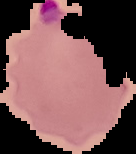

In [88]:
load_img(r"C:\Users\Lenovo\Downloads\archive (1)\Malarial Cell Image Data\malarial_cell_image_data\cell_images\Parasitized\C99P60ThinF_IMG_20150918_142334_cell_4.png")


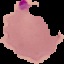

In [89]:
load_img(r"C:\Users\Lenovo\Downloads\archive (1)\Malarial Cell Image Data\malarial_cell_image_data\cell_images\Parasitized\C99P60ThinF_IMG_20150918_142334_cell_4.png",target_size=(64,64))


In [90]:
os.environ['KERAS_BACKEND']='tensorflow'
np.random.seed(321)

In [91]:
image_dir=r"C:\Users\Lenovo\Downloads\archive (1).zip\Malarial Cell Image Data \cell_images"
size=64
dataset=[]
label=[]

In [92]:
len(parasitized_img)

13780

In [93]:
parasitized_img = os.listdir(r"C:\Users\Lenovo\Downloads\archive (1)\Malarial Cell Image Data\malarial_cell_image_data\cell_images\Parasitized")

for i, img_name in enumerate(parasitized_img):
    if img_name.endswith('.png'):  # More robust way to check the extension
        image_path = os.path.join(r"C:\Users\Lenovo\Downloads\archive (1)\Malarial Cell Image Data\malarial_cell_image_data\cell_images\Parasitized", img_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        image = Image.fromarray(image)
        image = image.resize((size, size))  # Resize the image

        dataset.append(np.array(image))
        label.append(0)


In [94]:
uninfected_img = os.listdir(r"C:\Users\Lenovo\Downloads\archive (1)\Malarial Cell Image Data\malarial_cell_image_data\cell_images\Uninfected")

for i, img_name in enumerate(uninfected_img):
    if img_name.endswith('.png'):  # More robust way to check the extension
        image_path = os.path.join(r"C:\Users\Lenovo\Downloads\archive (1)\Malarial Cell Image Data\malarial_cell_image_data\cell_images\Uninfected", img_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        image = Image.fromarray(image)
        image = image.resize((size, size))  # Resize the image

        dataset.append(np.array(image))
        label.append(1)

In [95]:
len(uninfected_img)

13780

In [96]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

xtrain,xtest,ytrain,ytest=train_test_split(dataset,to_categorical(np.array(label)),test_size=0.2,random_state=0)

# CNN Model Architecture

In [109]:
import keras.layers as k

INPUT_SHAPE = (size, size, 3)

inp = k.Input(shape=INPUT_SHAPE)

conv1 = k.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(inp)
pool1 = k.MaxPool2D(pool_size=(2, 2))(conv1)
norm1 = k.BatchNormalization(axis=-1)(pool1)
drop1 = k.Dropout(rate=0.2)(norm1)

conv2 = k.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(drop1)
pool2 = k.MaxPool2D(pool_size=(2, 2))(conv2)
norm2 = k.BatchNormalization(axis=-1)(pool2)
drop2 = k.Dropout(rate=0.2)(norm2)

flat = k.Flatten()(drop2)

hidden1 = k.Dense(512, activation="relu")(flat)
norm3 = k.BatchNormalization(axis=-1)(hidden1)
drop3 = k.Dropout(rate=0.2)(norm3)

hidden2 = k.Dense(256, activation="relu")(drop3)
norm4 = k.BatchNormalization(axis=-1)(hidden2)
drop4 = k.Dropout(rate=0.2)(norm4)

out = k.Dense(2, activation='softmax')(drop4)


In [111]:
model = keras.Model(inputs=inp, outputs=out)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print(model.summary())


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,340,130 (16.56 MB)

 Trainable params: 4,338,466 (16.55 MB)

 Non-trainable params: 1,664 (6.50 KB)

None


In [113]:
history = model.fit(np.array(xtrain), ytrain,
                    batch_size=64, verbose=1, epochs=5, validation_split=0.1,
                    shuffle=False)

Epoch 1/5
311/311 ━━━━━━━━━━━━━━━━━━━━ 75s 192ms/step - accuracy: 0.7067 - loss: 0.6805 - val_accuracy: 0.7002 - val_loss: 1.7731
Epoch 2/5
311/311 ━━━━━━━━━━━━━━━━━━━━ 60s 192ms/step - accuracy: 0.9107 - loss: 0.2414 - val_accuracy: 0.8884 - val_loss: 0.4109
Epoch 3/5
311/311 ━━━━━━━━━━━━━━━━━━━━ 59s 191ms/step - accuracy: 0.9310 - loss: 0.1891 - val_accuracy: 0.8753 - val_loss: 0.4308
Epoch 4/5
311/311 ━━━━━━━━━━━━━━━━━━━━ 62s 200ms/step - accuracy: 0.9402 - loss: 0.1640 - val_accuracy: 0.9279 - val_loss: 0.2225
Epoch 5/5
311/311 ━━━━━━━━━━━━━━━━━━━━ 61s 196ms/step - accuracy: 0.9459 - loss: 0.1434 - val_accuracy: 0.9107 - val_loss: 0.2424


In [103]:
print("Test Accuracy: {:.2f}%".format(model.evaluate(np.array(xtest), np.array(ytest))[1] * 100))

173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9248 - loss: 0.2183
Test Accuracy: 92.58%


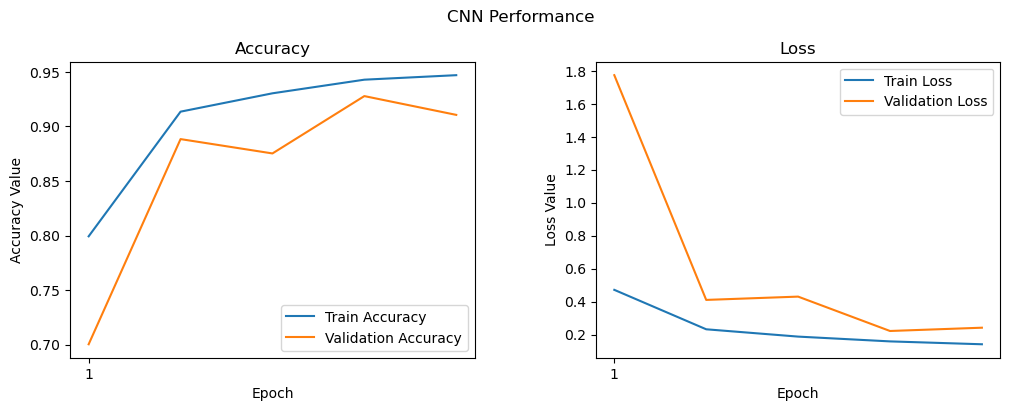

In [115]:
# Set up the figure and the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = fig.suptitle('CNN Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

# Prepare the epoch list
max_epoch = len(history.history['accuracy']) + 1
epoch_list = list(range(1, max_epoch))

# Plotting Accuracy
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc='best')

# Plotting Loss
ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc='best')

# Show the plots
plt.show()